In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

import adaboost_m1

get_ipython().magic('load_ext autoreload')
get_ipython().magic('autoreload 2')

In [2]:
X_train, y_train, X_test, y_test = adaboost_m1.make_data()

There should an approximately equal numbers of positive and negative labels.

In [3]:
pd.Series(y_train).value_counts()

-1.0    1019
 1.0     981
dtype: int64

In [4]:
pd.Series(y_test).value_counts()

-1.0    5049
 1.0    4951
dtype: int64

# Algorithm 10.1

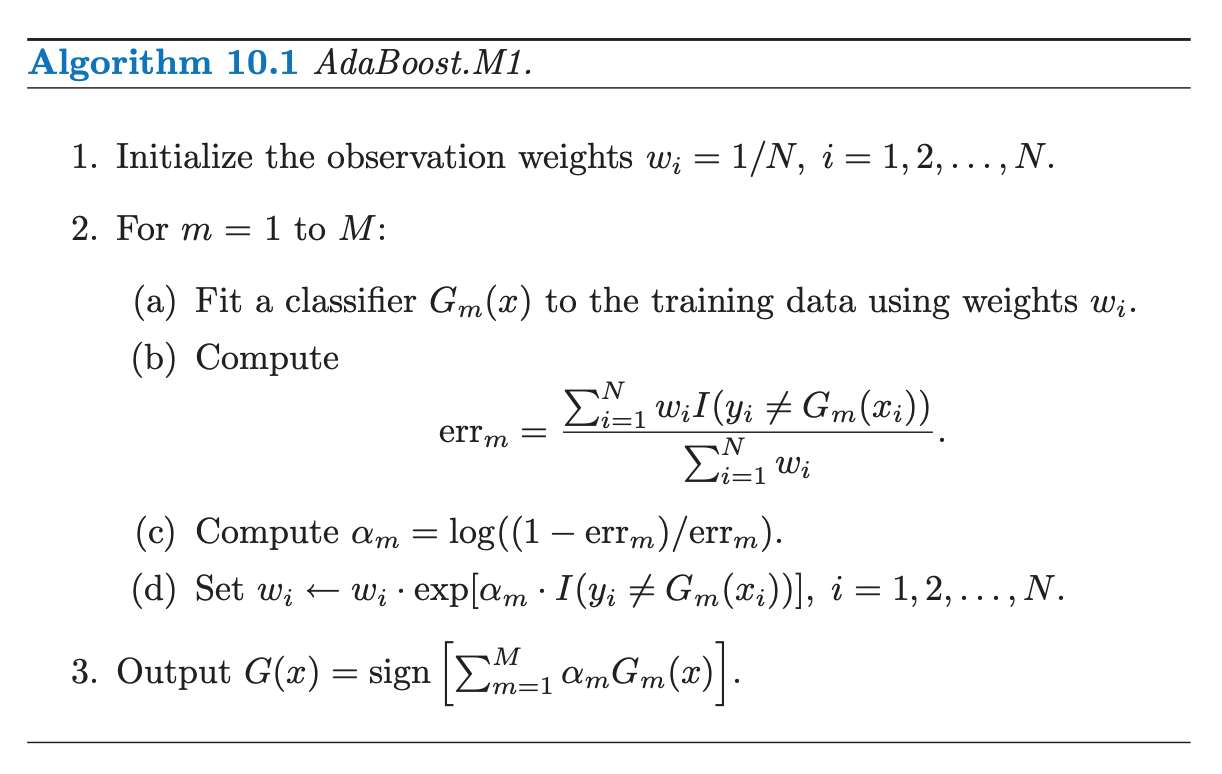

In [5]:
NUM_LEARNERS = 800
adaboost_classifier = adaboost_m1.adaboost_m1(X_train, y_train, num_learners=NUM_LEARNERS)

100%|██████████| 800/800 [00:02<00:00, 335.01it/s]


## Exponential loss

In [6]:
def calc_avg_exp_loss(y_preds: np.ndarray, y_truth: np.ndarray) -> float:
    return np.exp(- y_preds * y_truth).mean()

In [7]:
errs_train, errs_test, loss_train, loss_test = [], [], [], []
n_learners_array = np.arange(1, NUM_LEARNERS, 10)
for n_learners in tqdm(n_learners_array):
    preds_train = adaboost_classifier.predict(X_train, use_n_learners=n_learners)
    preds_test = adaboost_classifier.predict(X_test, use_n_learners=n_learners)
    errs_train.append((preds_train != y_train).mean())
    errs_test.append((preds_test != y_test).mean())
    loss_train.append(calc_avg_exp_loss(preds_train, y_train))
    loss_test.append(calc_avg_exp_loss(preds_test, y_test))

100%|██████████| 80/80 [00:21<00:00,  3.64it/s]


## Misclassification error only

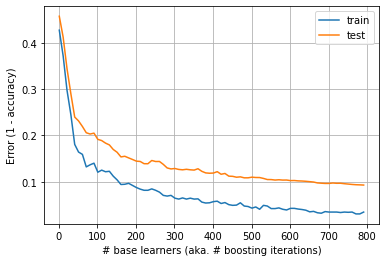

In [8]:
plt.plot(n_learners_array, errs_train, label='train')
plt.plot(n_learners_array, errs_test, label='test')
plt.ylabel('Error (1 - accuracy)')
plt.xlabel('# base learners (aka. # boosting iterations)')
plt.grid()
plt.legend()

# Misclassification error and exponential loss

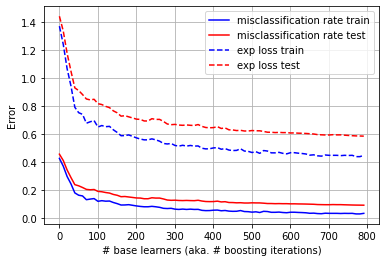

In [9]:
plt.plot(n_learners_array, errs_train, color='blue', linestyle='-', label='misclassification rate train')
plt.plot(n_learners_array, errs_test, color='red', linestyle='-', label='misclassification rate test')
plt.plot(n_learners_array, loss_train, color='blue', linestyle='--', label='exp loss train')
plt.plot(n_learners_array, loss_test, color='red', linestyle='--', label='exp loss test')

plt.ylabel('Error')
plt.xlabel('# base learners (aka. # boosting iterations)')
plt.grid()
plt.legend()